In [14]:
import numpy as np
import pandas as pd
import sklearn.svm as svm
import seaborn as sns
import scipy.io as sio
import matplotlib.pyplot as plt

In [15]:
mat = sio.loadmat('./data/ex6data2.mat')
data = pd.DataFrame(mat['X'],columns=['x1' ,'x2'])
data['y'] = mat['y']
print(data.head(5), data.shape)

         x1        x2  y
0  0.107143  0.603070  1
1  0.093318  0.649854  1
2  0.097926  0.705409  1
3  0.155530  0.784357  1
4  0.210829  0.866228  1 (863, 3)


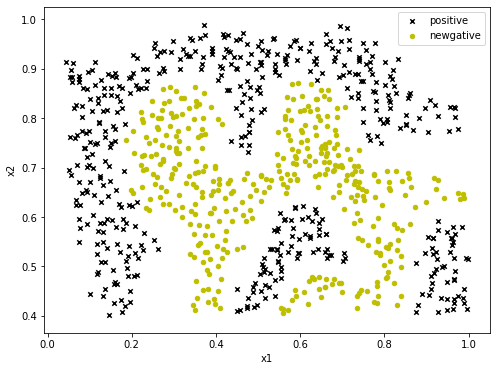

In [16]:
positive = data[data['y'].isin([1])]
negative = data[data['y'].isin([0])]
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(positive['x1'], positive['x2'], s=20, c='black', marker='x', label='positive')
ax.scatter(negative['x1'], negative['x2'], s=20, c='y', marker='o', label='newgative')
ax.legend()
ax.set_xlabel('x1')
ax.set_ylabel('x2')
plt.show()

In [17]:
svc = svm.SVC(C=100, kernel='rbf', gamma=10, probability=True)
svc

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [18]:
svc.fit(data[['x1', 'x2']], data['y'])
svc.score(data[['x1', 'x2']], data['y'])

0.9698725376593279

In [20]:
predict_prob = svc.predict_proba(data[['x1', 'x2']])[:, 0]

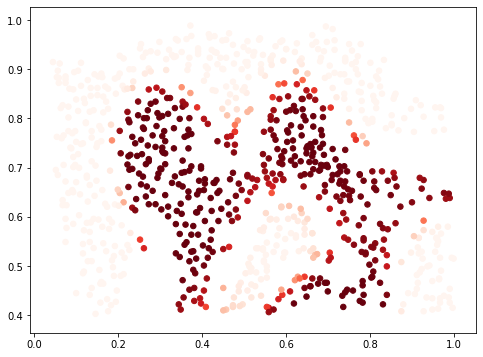

In [21]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(data['x1'], data['x2'], s=30, c=predict_prob, cmap='Reds')
plt.show()

In [26]:
svc1 = svm.SVC(C=100, kernel='rbf', gamma=0.1, probability=True)
svc1

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [28]:
svc1.fit(data[['x1', 'x2']], data['y'])
svc1.score(data[['x1', 'x2']], data['y'])

0.8111239860950173

In [29]:
predict_prob1 = svc1.predict_proba(data[['x1', 'x2']])[:, 0]

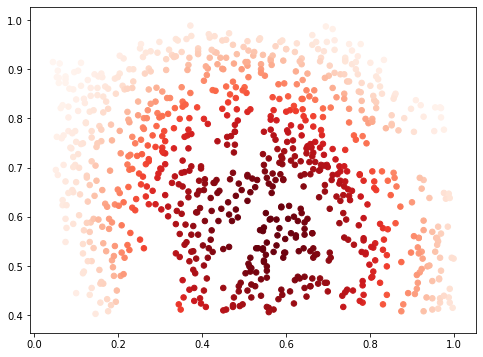

In [30]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(data['x1'], data['x2'], s=30, c=predict_prob1, cmap='Reds')
plt.show()